In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [70]:
elevator = pd.read_csv("NYC_elevators.csv", low_memory=False)
elevator

,JOB_FILING_NUMBER,DEVICE_ID,DEVICE_TYPE,DEVICE_STATUS,BUILDING_ELEVATOR_NUMBERS,BIS_NYC_DEVICE_ID,ELEVATOR_TYPE,ELEVATOR_SUB_TYPE,PHYSICAL_ADDRESS,ONLY_ELEVATOR_IN_BUILDING,...,ESCALATOR_NUMBER_OF_FLAT_STEPS,OUTDOOR_ESCALATOR,ESCALATOR_RISE(FEET),ESCALATOR_RISE(INCHES),ESCALATOR_SPEED,ESCALATOR_STEP_WIDTH(FEET),ESCALATOR_STEP_WIDTH(INCHES),ESCALATOR_TANDEM_OPERATION,ESCALATOR_TRAVEL_FROM_FLOOR,ESCALATOR_TRAVEL_TO_FLOOR
0,B00244114-I1,3P1789,Elevator,Active,NaN,3P1789,Passenger,NaN,250 CROWN STREET,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B00010588-I1,3P0986060,Elevator,Active,1,NaN,Passenger,Shipboard Elevator,4102 8 AVENUE,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B00010625-I1,3W0986155,Accessibility Lift,Active,NaN,NaN,NaN,NaN,961 MADISON STREET,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B00010754-I1,3P0986227,Elevator,Active,1,NaN,Passenger,NaN,1414 WEST 4 STREET,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,B00011003-I1,3P0986109,Elevator,Active,1,NaN,Passenger,Shipboard Elevator,804 JEFFERSON AVENUE,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35361,M00058164-I1,1P0986852,Elevator,Active,14,NaN,Passenger,NaN,20 BROAD STREET,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35362,M00157529-I1,1P24490,Elevator,Active,NaN,1P24490,Passenger,NaN,201 EAST 19 STREET,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35363,M00096110-I1,1P24088,Elevator,Active,N1,1P24088,Passenger,NaN,720 3 AVENUE,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35364,M00073140-I1,1P24366,Elevator,Active,S2,1P24366,Passenger,NaN,16 LIBERTY STREET,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
elevator.drop(columns = ["JOB_FILING_NUMBER","DEVICE_STATUS","BUILDING_ELEVATOR_NUMBERS","BIS_NYC_DEVICE_ID","ELEVATOR_SUB_TYPE"
                        ,"PHYSICAL_ADDRESS","ONLY_ELEVATOR_IN_BUILDING","OCCUPANT_EVACUATION_ELEVATOR","DEVICE_CONFIRMING_WITH_SEISMIC_COMPLAINCE","DEVICE_IN_CONJUNCTION_WITH_MTA_STATION","NEW_HOISTWAY"
                        ,"LOFT_LAW_BUILDING","DEVICE_JOB_DESCRIPTION","MACHINE_MODEL","TYPE_OF_MACHINE_BREAK","CONTROLLER_MODEL", "CONTROLLER_LOCATION"
                        ,"HOIST_ROPE_QTY","HOIST_ROPE_SIZE","CAR_COUNTERWEIGHT_ROPES_QTY","CAR_COUNTERWEIGHT_ROPES_SIZE","CAR_COUNTERWEIGHT_ROPES_ULTIMATE_STRENGTH"
                        ,"CAR_COUNTERWEIGHT_ROPES_MATERIAL","MACHINE_COUNTERWEIGHT_ROPES_QTY","MACHINE_COUNTERWEIGHT_ROPES_SIZE","MACHINE_COUNTERWEIGHT_ROPES_ULTIMATE_STRENGTH","MACHINE_COUNTERWEIGHT_ROPES_MATERIAL"
                        ,"CARGOVERNOR_ROPES_QTY","CARGOVERNOR_ROPES_SIZE","CARGOVERNOR_ROPES_ULTIMATE_STRENGTH","CARGOVERNOR_ROPES_MATERIAL","CWTGOVERNOR_ROPES_QTY"
                        ,"CWTGOVERNOR_ROPES_SIZE","CWTGOVERNOR_ROPES_ULTIMATE_STRENGTH","CWTGOVERNOR_ROPES_MATERIAL","CARGOVERNOR_LOCATION","CWTGOVERNOR_LOCATION"
                        ,"CWTGOVERNOR_TRIPPING_SPEED","CWTGOVERNOR_TYPE","POWERTYPE","MAIN_SUPPLY_POWER_TYPE","TRAVEL_FROM_FLOOR"
                        ,"TRAVEL_TO_FLOOR","MODE_OF_OPERATION","GLASS_HOISTWAY","ATRUIM_ELEVATOR","REGENERATIVE_DRIVE"
                        ,"CAR_SAFETY_TYPE","CAR_SAFETY_TYPE_OTHER","COUNTER_WEIGHT_SAFETY_TYPE","COUNTER_WEIGHT_SAFETY_TYPE_OTHER","CAR_OPENING"
                        ,"CAR_OPENING_DIRECTION","CONTACT_TYPE","CAR_TO_COUNTERWEIGHT_RATIO","TOP_EMERGENCY_EXIT_MIN_AREA","TOP_EMERGENCY_EXIT_MIN_SIDE"
                        ,"CAR_INSIDE_WIDTH(FEET)","CAR_INSIDE_WIDTH(INCHES)","CAR_INSIDE_DEPTH(FEET)","CAR_INSIDE_DEPTH(INCHES)","GLASS_CAR"
                        ,"MULTICOMPARTMENT","HOIST_OPENING","HOIST_DIRECTION","INTERLOCKS_TYPE","ELEVATOR_LANDING"
                        ,"NUMBER_OF_OPENINGS_FRONT","NUMBER_OF_OPENINGS_SIDE","NUMBER_OF_OPENINGS_REAR","TOTAL_NUMBER_OF_OPENINGS","INTERLOCKIN_BLIND_HOISTWAY"
                        ,"CAR_BUFFER_TYPE","CAR_BUFFER_ENGAGEMENT_SPEED","CAR_BUFFER_STROKE(FEET)","CAR_BUFFER_STROKE(INCHES)","CAR_BUFFER_REDUCED_STROKE"
                        ,"COUNTERWEIGHT_BUFFER","COUNTER_WEIGHT_BUFFER_TYPE","COUNTER_WEIGHT_BUFFER_MANUFACTURER","COUNTER_WEIGHT_BUFFER_ENGAGEMENT_SPEED","COUNTER_WEIGHT_BUFFER_STROKE(FEET)"
                        ,"COUNTER_WEIGHT_BUFFER_STROKE(INCHES)","ELEVATOR_LENGTH(FEET)","ELEVATOR_LENGTH(INCHES)","COUNTER_WEIGHT_BUFFER_REDUCED_STROKE","OCCUPIED_SPACE_BELOW"
                        ,"ATTENDANT_OPERATION","GLASS_OR_TRANSPARENT","PIT_DEPTH","CONVEYOR_CONFIGURATION","CONVEYOR_SAFETY_DEVICE_TYPE"
                        ,"CONVEYOR_COUNTER_WEIGHT_SAFETY_DEVICE_TYPE","HOLE_LESS_ELEVATOR","CAR_BUFFER","COUNTER_WEIGHT_BUFFER","ACCESSIBILITY_LIFT"
                        ,"CONVEYOR_TYPE","MACHINE_JACK_TYPE","OVERLOAD_DEVICE","PLATFORM_LIFT_TYPE","CAR_HOIST_CWT_OR_NONCWT","CAR_HOIST_LOCATION","PRIVATE_RESIDENCE","CAR_HOIST_OPENING","HOIST_CAPACITY"
                        ,"HOIST_CAR_WEIGHT","HOIST_CAR_MANUFACTURER","HOIST_COUNTER_WEIGHTED","HOIST_MAST_MANUFACTURER","HOIST_SAFETY_SERIAL_NUMBER","HOIST_SAFETY_EXPIRATION_DATE","HOIST_MODEL_NUM","HOIST_SAFETY_CAPACITY"
                        ,"ESCALATOR_ENERGY_SAVING_FUNCTION(SLEEP_MODE)","ESCALATOR_ANGLE_OF_INCLINATION","ESCALATOR_BRAKE_TORQUE","ESCALATOR_CAPACITY(LBS)"
                        ,"FLAME_HEAT_SMOKE_PROTECTION_PROVIDED","ESCALATOR_MANUFACTURER","ESCALATOR_MODEL","ESCALATOR_NUMBER_OF_FLAT_STEPS","OUTDOOR_ESCALATOR"
                        ,"ESCALATOR_RISE(FEET)","ESCALATOR_RISE(INCHES)","ESCALATOR_SPEED","ESCALATOR_STEP_WIDTH(FEET)","ESCALATOR_STEP_WIDTH(INCHES)"
                        ,"ESCALATOR_TANDEM_OPERATION","ESCALATOR_TRAVEL_FROM_FLOOR","ESCALATOR_TRAVEL_TO_FLOOR"],inplace=True)



In [72]:
elevator.drop(columns = ["DEVICE_TYPE","MACHINE_LOCATION", "NUMBER_OF_STOPS","MACHINE_MANUFACTURER","CONTROLLER_MANUFACTURER","HOIST_ROPE_MATERIAL", "CARGOVERNOR_TYPE","HOIST_ROPE_ULTIMATE_STRENGTH","CARGOVERNOR_TRIPPING_SPEED","COMPENSATION_MEANS","PLUNGER_TYPE","COMPENSATION_TIE_DOWN"],inplace=True)

In [73]:
elevator.shape

(35366, 24)

In [74]:
elevator.isnull().sum()

DEVICE_ID                                 0
ELEVATOR_TYPE                          1494
MEETS_THE_STRETCHER_CAR_REQUIREMENT    1921
FIRE_EMERGENCY_PHASE                   1921
DESTINATION_DISPATCH_SYSTEM            1921
FIRE_SERVICE_ACCESS_ELEVATOR           1921
MACHINE_TYPE                            426
TOTAL_TRAVEL(FEET)                      425
ELEVATOR_CAPACITY(LBS)                  425
ELEVATOR_SPEED(FPM)                     425
ELEVATOR_CONTROL                        994
LOAD_WEIGHING_DEVICE                   1363
CAR_OPENING_OPERATION                  1391
ELEVATOR_MANUFACTURER                  1135
CAR_INSIDE_AREA                         566
SIZED_FOR_STRETCHER_REQUIREMENT        1926
ELEVATOR_OPERATION                      977
ELEVATOR_DOORFEATURES                   723
HOIST_MANUFACTURER                     3027
DOOR_MONITORING_CIRCUITS               1919
FIRE_RATED_CONSTRUCTION_TYPE            977
SELF_CLOSING_EMERGENCY_DOORS           1919
CAR_BUFFER_MANUFACTURER         

In [75]:
elevator = elevator.dropna()

In [76]:
elevator.isnull().sum()

DEVICE_ID                              0
ELEVATOR_TYPE                          0
MEETS_THE_STRETCHER_CAR_REQUIREMENT    0
FIRE_EMERGENCY_PHASE                   0
DESTINATION_DISPATCH_SYSTEM            0
FIRE_SERVICE_ACCESS_ELEVATOR           0
MACHINE_TYPE                           0
TOTAL_TRAVEL(FEET)                     0
ELEVATOR_CAPACITY(LBS)                 0
ELEVATOR_SPEED(FPM)                    0
ELEVATOR_CONTROL                       0
LOAD_WEIGHING_DEVICE                   0
CAR_OPENING_OPERATION                  0
ELEVATOR_MANUFACTURER                  0
CAR_INSIDE_AREA                        0
SIZED_FOR_STRETCHER_REQUIREMENT        0
ELEVATOR_OPERATION                     0
ELEVATOR_DOORFEATURES                  0
HOIST_MANUFACTURER                     0
DOOR_MONITORING_CIRCUITS               0
FIRE_RATED_CONSTRUCTION_TYPE           0
SELF_CLOSING_EMERGENCY_DOORS           0
CAR_BUFFER_MANUFACTURER                0
COUNTER_WEIGHT_GUARD                   0
dtype: int64

In [77]:
elevator.loc[:, 'ELEVATOR_MANUFACTURER'] = elevator['ELEVATOR_MANUFACTURER'].str.lower()
elevator.loc[:, 'ELEVATOR_MANUFACTURER'] = elevator['ELEVATOR_MANUFACTURER'].str.capitalize()
elevator.loc[:, 'ELEVATOR_MANUFACTURER'] = elevator['ELEVATOR_MANUFACTURER'].str.replace('.', '')

/var/folders/3b/x_32pyq92nn3k3lvvrp48jzm0000gn/T/ipykernel_16944/62401412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elevator.loc[:, 'ELEVATOR_MANUFACTURER'] = elevator['ELEVATOR_MANUFACTURER'].str.lower()
/var/folders/3b/x_32pyq92nn3k3lvvrp48jzm0000gn/T/ipykernel_16944/62401412.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elevator.loc[:, 'ELEVATOR_MANUFACTURER'] = elevator['ELEVATOR_MANUFACTURER'].str.capitalize()
/var/folders/3b/x_32pyq92nn3k3lvvrp48jzm0000gn/T/ipykernel_16944/62401412.py:

In [78]:
elevator["ELEVATOR_MANUFACTURER"].value_counts().head(10)

Gal                  21667
Otis                  2651
Existing              1976
Wittur                 723
Tke                    626
Eci                    304
Westinghouse           287
Thyssenkrupp           263
Exisitng               197
Gal manufacturing      177
Name: ELEVATOR_MANUFACTURER, dtype: int64

In [79]:
elevator['ELEVATOR_MANUFACTURER']

0        Existing
1             Gal
3             Gal
4             Gal
5             Gal
           ...   
35361      Wittur
35362         Gal
35363         Gal
35364        Otis
35365         Gal
Name: ELEVATOR_MANUFACTURER, Length: 30880, dtype: object

In [80]:
elevator.shape

(30880, 24)

In [81]:
elevator.head()

,DEVICE_ID,ELEVATOR_TYPE,MEETS_THE_STRETCHER_CAR_REQUIREMENT,FIRE_EMERGENCY_PHASE,DESTINATION_DISPATCH_SYSTEM,FIRE_SERVICE_ACCESS_ELEVATOR,MACHINE_TYPE,TOTAL_TRAVEL(FEET),ELEVATOR_CAPACITY(LBS),ELEVATOR_SPEED(FPM),...,CAR_INSIDE_AREA,SIZED_FOR_STRETCHER_REQUIREMENT,ELEVATOR_OPERATION,ELEVATOR_DOORFEATURES,HOIST_MANUFACTURER,DOOR_MONITORING_CIRCUITS,FIRE_RATED_CONSTRUCTION_TYPE,SELF_CLOSING_EMERGENCY_DOORS,CAR_BUFFER_MANUFACTURER,COUNTER_WEIGHT_GUARD
0,3P1789,Passenger,False,True,False,False,Traction,65.0,1800,100.0,...,22.46,False,Manual,Interlocks,EXISTING,True,False,False,EXISTING,True
1,3P0986060,Passenger,True,True,False,False,Traction,69.0,2500,200.0,...,30.00,True,Power,Interlocks,GAL,True,True,False,Hollister Whitney,True
3,3P0986227,Passenger,True,True,False,False,MRL,64.0,3500,150.0,...,35.00,True,Power,Interlocks,GAL,True,True,False,AMERIVATOR,True
4,3P0986109,Passenger,True,True,False,False,Traction,69.0,2500,150.0,...,28.69,True,Power,Interlocks,GAL,True,True,False,AMERIVATOR,True
5,3P880,Passenger,False,True,False,False,Others,70.0,1500,100.0,...,19.06,False,Manual,Interlocks,GAL,True,True,False,otis,True


In [82]:
elevator["ELEVATOR_CONTROL"]

0        Solid State
1        Solid State
3        Solid State
4        Solid State
5        Solid State
            ...     
35361    Solid State
35362    Solid State
35363    Solid State
35364    Solid State
35365    Solid State
Name: ELEVATOR_CONTROL, Length: 30880, dtype: object

In [83]:
elevator.describe()

,TOTAL_TRAVEL(FEET),ELEVATOR_SPEED(FPM),CAR_INSIDE_AREA
count,30880.000000,30880.000000,30880.000000
mean,154.697826,343.586431,39.421043
std,709.994886,891.698886,285.487872
min,0.000000,0.000000,0.000000
25%,60.000000,125.000000,22.360000
50%,102.000000,250.000000,27.610000
75%,190.000000,500.000000,35.445000
max,120130.000000,110135.000000,39412.000000


<AxesSubplot:>

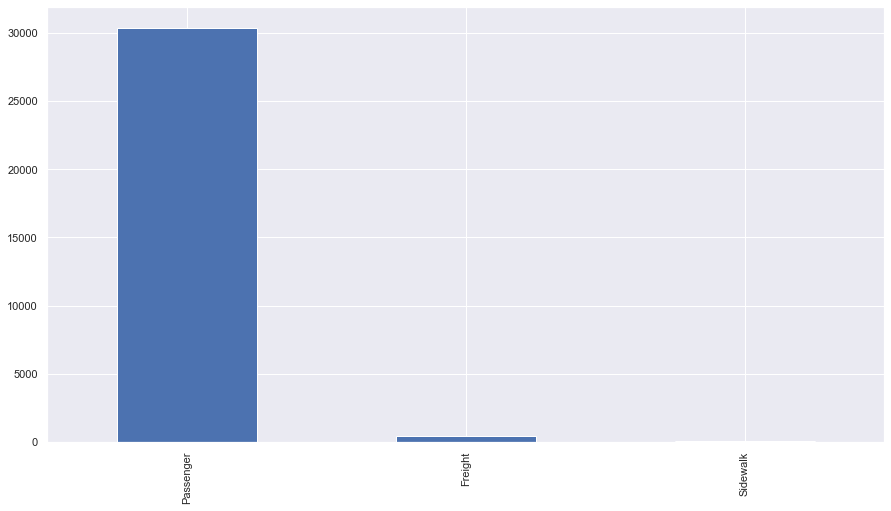

In [84]:
elevator['ELEVATOR_TYPE'].value_counts().plot(kind='bar')

In [85]:
elevator["MACHINE_TYPE"].value_counts(normalize = True) * 100

Traction           75.579663
Hydraulic          13.536269
MRL                 7.344560
Others              2.380181
Drum                1.130181
Screw-Column        0.022668
Rack and Pinion     0.006477
Name: MACHINE_TYPE, dtype: float64

In [86]:
rslt_df = elevator.sort_values(by = 'TOTAL_TRAVEL(FEET)', ascending=False).head(10)
rslt_df[["ELEVATOR_MANUFACTURER","TOTAL_TRAVEL(FEET)"]]

,ELEVATOR_MANUFACTURER,TOTAL_TRAVEL(FEET)
24767,Existing,120130.0
13527,Gal,14416.0
26850,Gal,13811.0
29029,Gal,6533.0
17499,Schindler,5601.0
14292,Gal,3764.0
5921,Gal,3500.0
15838,Gal,3500.0
12886,Cec door operator,3454.0
18334,Gal,3000.0


In [87]:
rslt_df = elevator.sort_values(by = 'ELEVATOR_SPEED(FPM)', ascending=False).head(10)
rslt_df[["ELEVATOR_MANUFACTURER","ELEVATOR_SPEED(FPM)"]]

,ELEVATOR_MANUFACTURER,ELEVATOR_SPEED(FPM)
7101,Thyssenkrupp,110135.0
29263,Gal,100400.0
29108,Gal,10000.0
10889,Gal,7000.0
11458,Gal,5000.0
32704,Gal,5000.0
9328,Gal,5000.0
6911,Gal,4125.0
8243,Sematic,4000.0
8238,Sematic,4000.0


In [88]:
elevator["ELEVATOR_CAPACITY(LBS)"].head()

0    1800
1    2500
3    3500
4    2500
5    1500
Name: ELEVATOR_CAPACITY(LBS), dtype: object

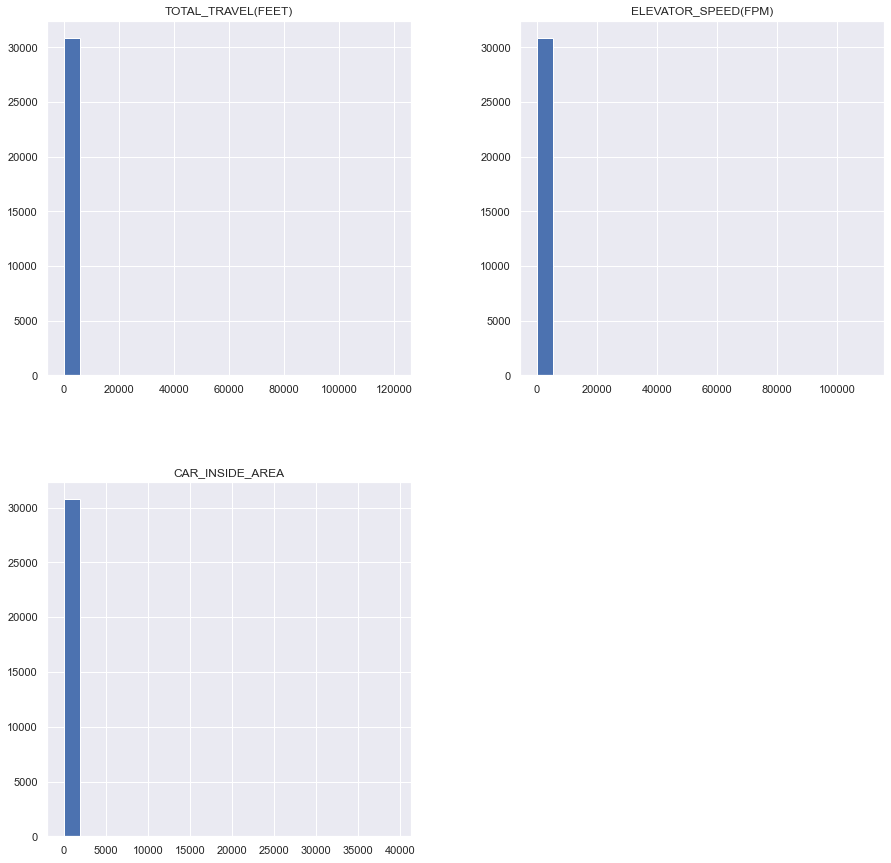

In [89]:
elevator.hist(bins=20, figsize=(15,15));

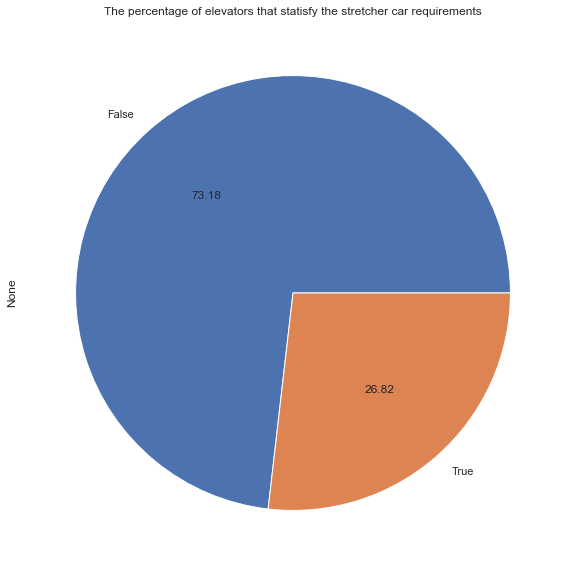

In [90]:
plt.subplots(figsize=(10, 10))
elevator.groupby('MEETS_THE_STRETCHER_CAR_REQUIREMENT').size().plot(title = "The percentage of elevators that statisfy the stretcher car requirements", kind='pie', autopct='%.2f')
plt.show()

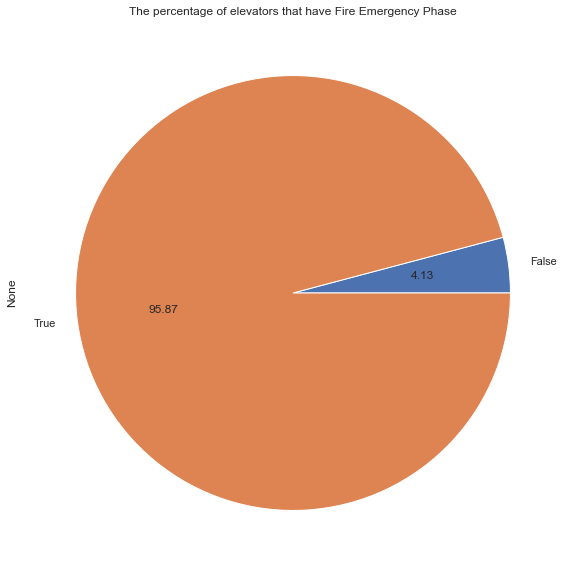

In [91]:
plt.subplots(figsize=(10, 10))
elevator.groupby('FIRE_EMERGENCY_PHASE').size().plot(title = "The percentage of elevators that have Fire Emergency Phase", kind='pie', autopct='%.2f')
plt.show()

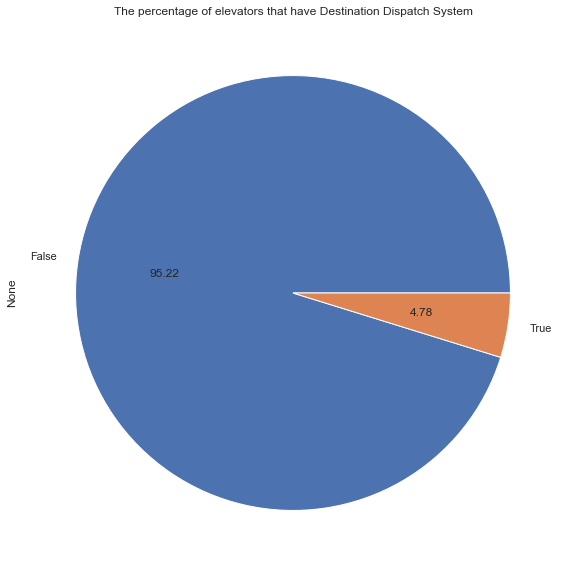

In [92]:
plt.subplots(figsize=(10, 10))
elevator.groupby('DESTINATION_DISPATCH_SYSTEM').size().plot(title = "The percentage of elevators that have Destination Dispatch System", kind='pie', autopct='%.2f')
plt.show()

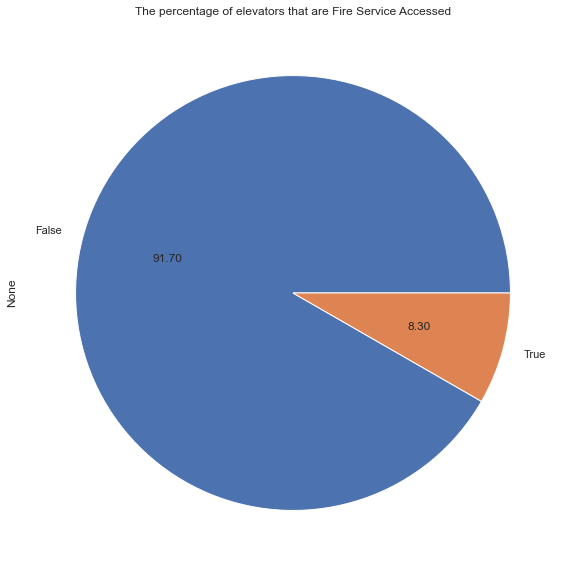

In [93]:
plt.subplots(figsize=(10, 10))
elevator.groupby('FIRE_SERVICE_ACCESS_ELEVATOR').size().plot(title = "The percentage of elevators that are Fire Service Accessed", kind='pie', autopct='%.2f')
plt.show()

In [94]:
rslt_df = elevator.sort_values(by = 'TOTAL_TRAVEL(FEET)', ascending=False).head(10)
rslt_df[["ELEVATOR_MANUFACTURER","TOTAL_TRAVEL(FEET)"]]

,ELEVATOR_MANUFACTURER,TOTAL_TRAVEL(FEET)
24767,Existing,120130.0
13527,Gal,14416.0
26850,Gal,13811.0
29029,Gal,6533.0
17499,Schindler,5601.0
14292,Gal,3764.0
5921,Gal,3500.0
15838,Gal,3500.0
12886,Cec door operator,3454.0
18334,Gal,3000.0


In [95]:
rslt_df = elevator.sort_values(by = 'ELEVATOR_SPEED(FPM)', ascending=False).head(10)
rslt_df[["ELEVATOR_MANUFACTURER","ELEVATOR_SPEED(FPM)"]]

,ELEVATOR_MANUFACTURER,ELEVATOR_SPEED(FPM)
7101,Thyssenkrupp,110135.0
29263,Gal,100400.0
29108,Gal,10000.0
10889,Gal,7000.0
11458,Gal,5000.0
32704,Gal,5000.0
9328,Gal,5000.0
6911,Gal,4125.0
8243,Sematic,4000.0
8238,Sematic,4000.0


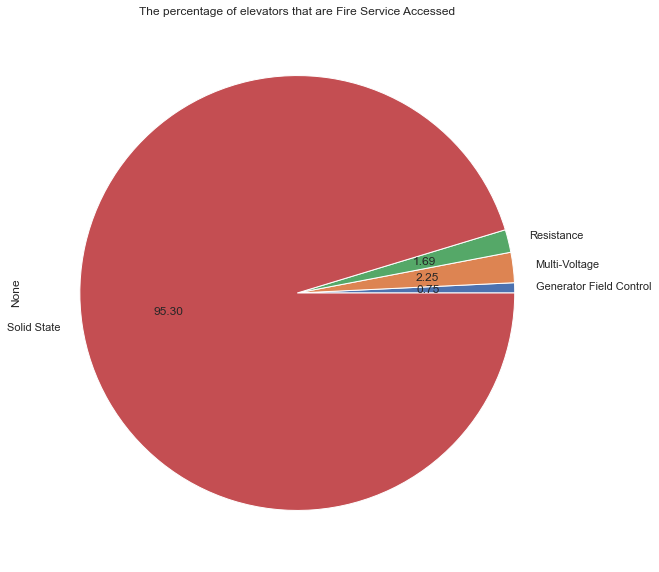

In [96]:
plt.subplots(figsize=(10, 10))
elevator.groupby('ELEVATOR_CONTROL').size().plot(title = "The percentage of elevators that are Fire Service Accessed", kind='pie', autopct='%.2f')
plt.show()

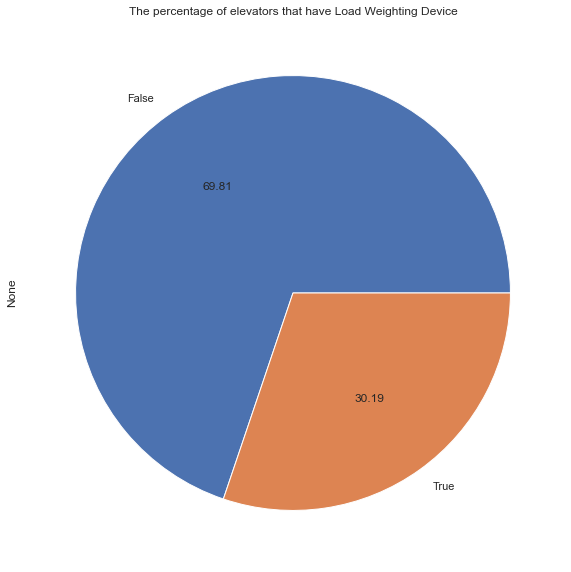

In [97]:
plt.subplots(figsize=(10, 10))
elevator.groupby('LOAD_WEIGHING_DEVICE').size().plot(title = "The percentage of elevators that have Load Weighting Device", kind='pie', autopct='%.2f')
plt.show()

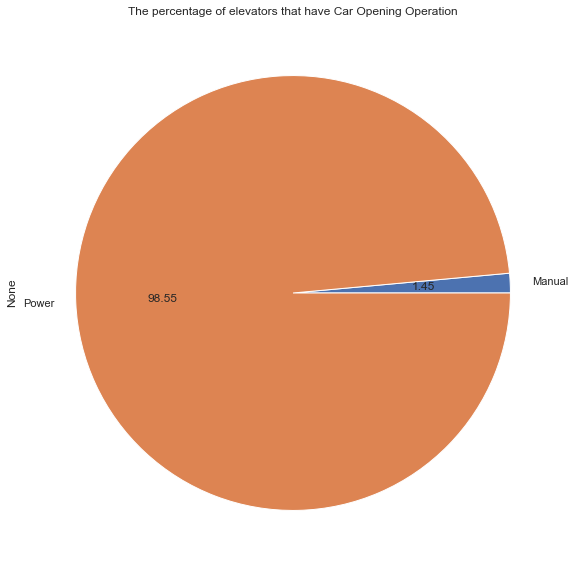

In [98]:
plt.subplots(figsize=(10, 10))
elevator.groupby('CAR_OPENING_OPERATION').size().plot(title = "The percentage of elevators that have Car Opening Operation", kind='pie', autopct='%.2f')
plt.show()

In [99]:
elevator["ELEVATOR_MANUFACTURER"].value_counts().head(10)

Gal                  21667
Otis                  2651
Existing              1976
Wittur                 723
Tke                    626
Eci                    304
Westinghouse           287
Thyssenkrupp           263
Exisitng               197
Gal manufacturing      177
Name: ELEVATOR_MANUFACTURER, dtype: int64

In [100]:
rslt_df = elevator.sort_values(by = 'CAR_INSIDE_AREA', ascending=False).head(10)
rslt_df[["ELEVATOR_MANUFACTURER","CAR_INSIDE_AREA"]]

,ELEVATOR_MANUFACTURER,CAR_INSIDE_AREA
23681,Gal,39412.0
26499,Gal,5372.0
21409,Gal,4851.0
4725,Gal,4402.0
18881,Gal,4402.0
28623,Thyssen,4131.0
34450,Thyssen,4131.0
27933,Thyssen,4131.0
673,Fujitec,4092.0
11706,Fujitec,4092.0


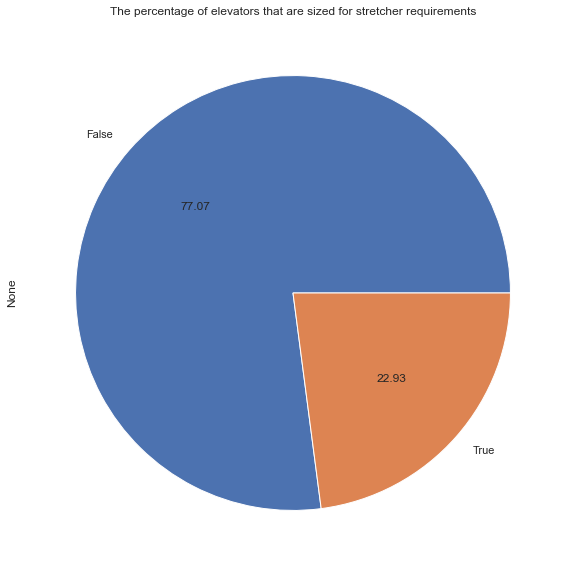

In [101]:
plt.subplots(figsize=(10, 10))
elevator.groupby('SIZED_FOR_STRETCHER_REQUIREMENT').size().plot(title = "The percentage of elevators that are sized for stretcher requirements", kind='pie', autopct='%.2f')
plt.show()

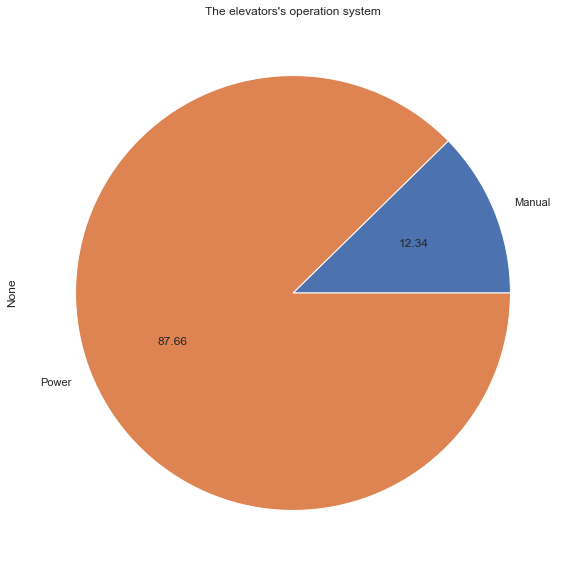

In [102]:
plt.subplots(figsize=(10, 10))
elevator.groupby('ELEVATOR_OPERATION').size().plot(title = "The elevators's operation system", kind='pie', autopct='%.2f')
plt.show()

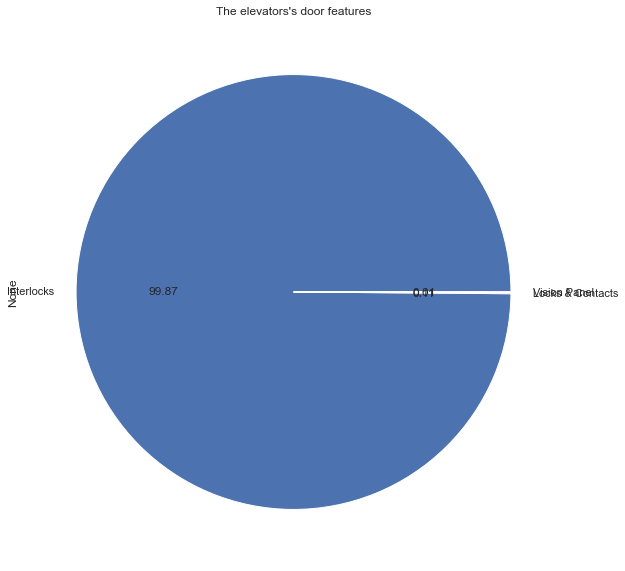

In [103]:
plt.subplots(figsize=(10, 10))
elevator.groupby('ELEVATOR_DOORFEATURES').size().plot(title = "The elevators's door features", kind='pie', autopct='%.2f')
plt.show()

In [104]:
elevator["ELEVATOR_DOORFEATURES"].value_counts().head(10)

Interlocks          30841
Locks & Contacts       35
Vision Panel            4
Name: ELEVATOR_DOORFEATURES, dtype: int64

In [105]:
elevator["HOIST_MANUFACTURER"].value_counts().head(10)

GAL         17166
G.A.L.       2358
gal          1778
OTIS         1589
existing     1307
Otis         1090
TKE           655
EXISTING      406
WITTUR        395
Gal           365
Name: HOIST_MANUFACTURER, dtype: int64

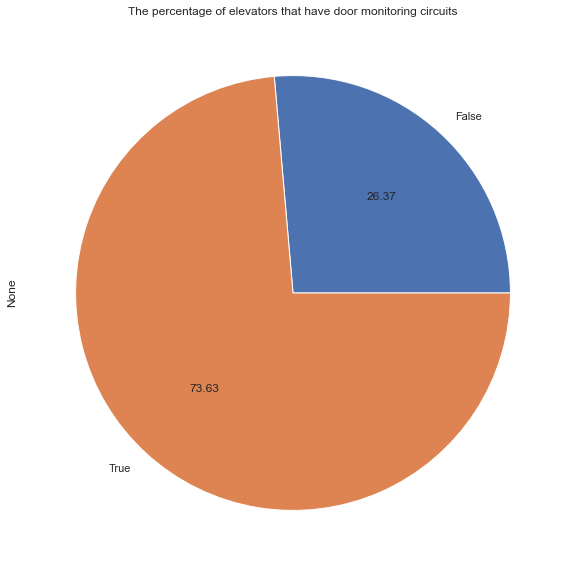

In [106]:
plt.subplots(figsize=(10, 10))
elevator.groupby('DOOR_MONITORING_CIRCUITS').size().plot(title = "The percentage of elevators that have door monitoring circuits", kind='pie', autopct='%.2f')
plt.show()

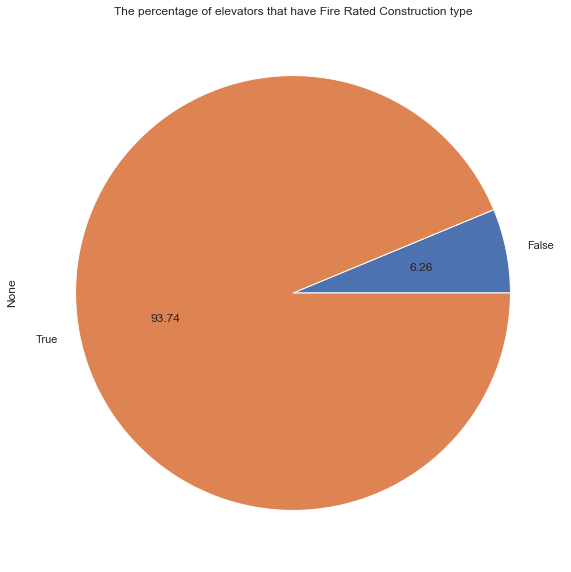

In [107]:
plt.subplots(figsize=(10, 10))
elevator.groupby('FIRE_RATED_CONSTRUCTION_TYPE').size().plot(title = "The percentage of elevators that have Fire Rated Construction type", kind='pie', autopct='%.2f')
plt.show()

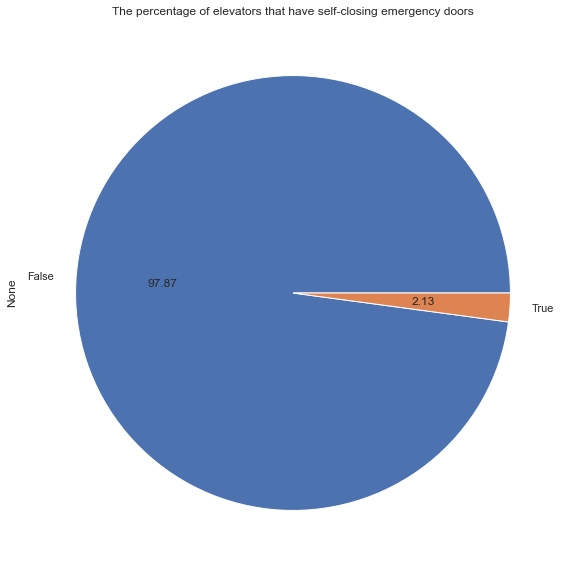

In [108]:
plt.subplots(figsize=(10, 10))
elevator.groupby('SELF_CLOSING_EMERGENCY_DOORS').size().plot(title = "The percentage of elevators that have self-closing emergency doors", kind='pie', autopct='%.2f')
plt.show()

In [109]:
elevator["CAR_BUFFER_MANUFACTURER"].value_counts().head(10)

OTIS                 2933
EXISTING             2839
Hollister Whitney    2487
Existing             2407
Otis                 2138
existing             1753
HW                   1261
Westinghouse         1003
OLEO                  965
HOLLISTER WHITNEY     830
Name: CAR_BUFFER_MANUFACTURER, dtype: int64

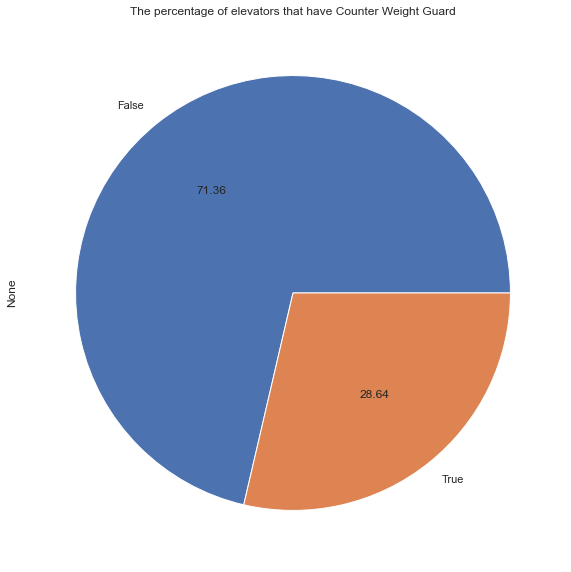

In [110]:
plt.subplots(figsize=(10, 10))
elevator.groupby('COUNTER_WEIGHT_GUARD').size().plot(title = "The percentage of elevators that have Counter Weight Guard", kind='pie', autopct='%.2f')
plt.show()

In [111]:
elevator["ELEVATOR_MANUFACTURER"].value_counts().head(10)

Gal                  21667
Otis                  2651
Existing              1976
Wittur                 723
Tke                    626
Eci                    304
Westinghouse           287
Thyssenkrupp           263
Exisitng               197
Gal manufacturing      177
Name: ELEVATOR_MANUFACTURER, dtype: int64

In [112]:
contingency_table = pd.crosstab(elevator['MEETS_THE_STRETCHER_CAR_REQUIREMENT'], elevator['DESTINATION_DISPATCH_SYSTEM'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")
## If the p-value is less than a chosen significance level (e.g., 0.05), you can reject the null hypothesis and conclude that there is a significant relationship.

Chi-Square Value: 424.5117646600694
P-value: 2.5434292421559705e-94


In [113]:
contingency_table = pd.crosstab(elevator['FIRE_SERVICE_ACCESS_ELEVATOR'], elevator['FIRE_RATED_CONSTRUCTION_TYPE'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-Square Value: {chi2}")
print(f"P-value: {p}")

Chi-Square Value: 4.928591745298074
P-value: 0.026415836260233496


<AxesSubplot:>

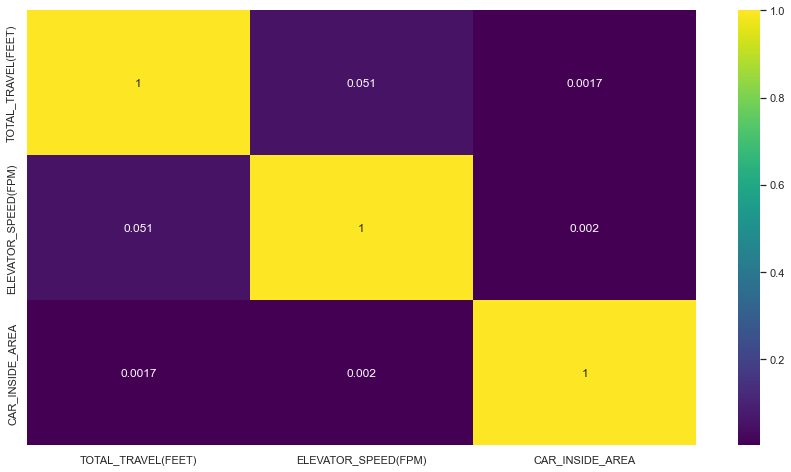

In [114]:
sns.set(rc = {'figure.figsize':(15,8)})
cor = elevator.corr()
sns.heatmap(elevator.corr(), annot = True, cmap='viridis')

In [115]:
elevator["ELEVATOR_TYPE"].value_counts().head(10)

Passenger    30393
Freight        445
Sidewalk        42
Name: ELEVATOR_TYPE, dtype: int64

In [116]:
elevator

,DEVICE_ID,ELEVATOR_TYPE,MEETS_THE_STRETCHER_CAR_REQUIREMENT,FIRE_EMERGENCY_PHASE,DESTINATION_DISPATCH_SYSTEM,FIRE_SERVICE_ACCESS_ELEVATOR,MACHINE_TYPE,TOTAL_TRAVEL(FEET),ELEVATOR_CAPACITY(LBS),ELEVATOR_SPEED(FPM),...,CAR_INSIDE_AREA,SIZED_FOR_STRETCHER_REQUIREMENT,ELEVATOR_OPERATION,ELEVATOR_DOORFEATURES,HOIST_MANUFACTURER,DOOR_MONITORING_CIRCUITS,FIRE_RATED_CONSTRUCTION_TYPE,SELF_CLOSING_EMERGENCY_DOORS,CAR_BUFFER_MANUFACTURER,COUNTER_WEIGHT_GUARD
0,3P1789,Passenger,False,True,False,False,Traction,65.0,1800,100.0,...,22.46,False,Manual,Interlocks,EXISTING,True,False,False,EXISTING,True
1,3P0986060,Passenger,True,True,False,False,Traction,69.0,2500,200.0,...,30.00,True,Power,Interlocks,GAL,True,True,False,Hollister Whitney,True
3,3P0986227,Passenger,True,True,False,False,MRL,64.0,3500,150.0,...,35.00,True,Power,Interlocks,GAL,True,True,False,AMERIVATOR,True
4,3P0986109,Passenger,True,True,False,False,Traction,69.0,2500,150.0,...,28.69,True,Power,Interlocks,GAL,True,True,False,AMERIVATOR,True
5,3P880,Passenger,False,True,False,False,Others,70.0,1500,100.0,...,19.06,False,Manual,Interlocks,GAL,True,True,False,otis,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35361,1P0986852,Passenger,True,True,False,False,MRL,47.0,3500,150.0,...,35.29,False,Power,Interlocks,WITTUR,True,True,False,KONE,False
35362,1P24490,Passenger,False,True,False,False,Traction,170.0,"2,000",250.0,...,24.08,True,Power,Interlocks,G.A.L.,True,True,False,EXISTING,False
35363,1P24088,Passenger,True,True,True,False,Traction,100.0,4000,500.0,...,38.37,True,Power,Interlocks,GAL,False,True,False,Westinghouse,False
35364,1P24366,Passenger,False,True,False,False,Traction,844.0,4000,800.0,...,64.75,False,Power,Interlocks,Otis,True,True,False,Otis,True


In [117]:
elevator.to_csv('elevators_clean.csv')